# Intro to Probability
https://www.amazon.com/Introduction-Probability-Chapman-Statistical-Science/dp/1466575573

## Chap 6. Moments

### Terms/Highlights
- If 2 normal distributions have the same values of $(\mu, \sigma^2)$. They are not necessarily the same (or even alike). In general, there could exist 2 different distributions that pretty differ each other but have the same parameters.

- **Moments** are useful to describe what a distribution looks like including: mean, variance, symmetry, skewness, tails...
  - *n*th ***moment***: $E(X^n)$
  - *n*th ***central moment***: $E((X - \mu)^n)$
  - *n*th ***standardized moment***: $E\left(\left(\frac{X - \mu}{\sigma}\right)^n\right)$

- Usually use the first 4 moments:
  - $E(X)$ = *1st moment*
  - $Var(X) = E(X - \mu)^2$ $\rightarrow$ *2nd central moment*
  - $Skew(X) = E\left(\frac{X - \mu}{\sigma}\right)^3$ $\rightarrow$ *3rd standardized moment*
    - Describe the skewness of data
    - $Skew(X) > 0$ means right-skewed
  - $Kurt(X) = E\left(\frac{X = \mu}{\sigma}\right)^4 - 3$ $\rightarrow$ *4th standardized moment, (shifted)*
    - Describe the tails of data
    - Large $Kurt(X)$ means long tails

- Looking at the PDF:
  - **center**: the region $(\mu - \sigma, \mu + \sigma)$, within one standard deviation
  - **shoulders**: the regions $(\mu - 2\sigma, \mu - \sigma)$ and $(\mu + \sigma, \mu + 2\sigma)$, from one standard deviation to 2 standard deviation
  - **tails**: the regions $(-\infty, \mu - 2\sigma)$ and $(\mu + 2\sigma, +\infty)$, more than 2 standard deviations

- Need to distinguish *sample parameters* from *population parameters*
  - Sample mean: $\bar{X}_n$, population mean: $\mu$
  - Law of large numbers: as $n \to \infty, \bar{X}_n \to \mu$

- **Moment generating function (MGF)** of a r.v $X$ is $M(t) = E(e^{tX})$. Condition: $M(t)$ must be finite on some open interval $(-a, a)$ containing 0.
  - Motivation: computing $E(X^n)$ by LOTUS is exhausting. MGF offers a nicer approach.
  - Not all r.v.s have an MGF.

- 3 important theorems related to MGF:
  - *Theorem 1.* **Moments** via MGF: take the *n*th derivative of MGF, at 0
    - $E(X^n) = M^{(n)}(0)$
  - *Theorem 2.* MGF determines distribution
    - $MGF(X) = MGF(Y) \implies X = Y$
  - *Theorem 3.* MGF of sum independent r.v.s
    - $M_{X+Y}(t) = M_X(t) M_Y(t)$, if $X$ and $Y$ are independent of each other

- Generating moments with MGFs
  - Common technique: *expand the MGF and match the expression by taylor series.*<br>
  For ex, if $M(t) = \frac{1}{1-t}$, then:
  $M(t) = \sum\limits^\infty_{n=0} t^n = \sum\limits^\infty_{n=0} n! \frac{t^n}{n!}$<br>
  And by Taylor series, $M(t) = \sum\limits^\infty_{n=0} E(X^n) \frac{t^n}{n!}$.<br>
  Matching coefficients $\implies$ $E(X^n) = n!$

- Even if the MGF does not exist, we could probably obtain the moments. Computing Log-Normal moments is an example.

- **Probability generating function (MGF)** 
  - For non-negative integer-valued r.v X
  - Given by $E(t^X)$
- Relationship between PGF and MGF:
  - $E(t^X) = E(e^{X \log t})$, PGF is the MGF evaluated at $\log t$
  - Example of using PGF: generting dice probabilities (roll 6 dice, what is the prob. that the total values on all dice equal 18 = ?)

- PGF determines the distribution
- Recover distribution from the PGF $g_X(t)$ by $p_k = P(X=k) = \frac{g_X^{(k)}(0)}{k!}$

### Programming (R)
- **curve**: for plots
- **integrate**: to calculate integrals
- **dnorm/rnorm/qnorm**: normal distribution
  - *dnorm*: PDF
  - *pnorm*: CDF
  - *rnorm*: sampling function
  - *qnorm*: to compute quantile (compute $x$ where $P(X \le x) = a$)
  - The same convention applies to other distribution. For example, *pexp* refers to the CDF of the Exponential distribution.
- **uniroot**: find ONE root of a function (ie. find $x$ such that $f(x) = 0$). Note: only one root (if exists) will be found
- **optimize**: compute the maximum/minimum of a function over an interval
- **which/which.max/which.min**: find the first index that matches a condition

In [1]:
library(repr)

figsize <- function(w, h) { options(repr.plot.width=w, repr.plot.height=h) }

In [2]:
# Declare a function
M <- function(t) { exp(t^2/2) }

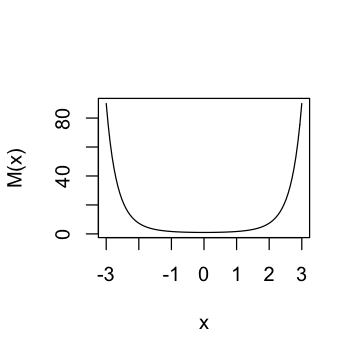

In [3]:
figsize(3, 3)
curve(M, from=-3, to=3)

In [4]:
# Take the 6th moment of X ~ N(0, 1) by LOTUS
g <- function(x) { x^6*dnorm(x) }
integrate(g, lower=-Inf, upper=Inf)

15 with absolute error < 7.9e-05

In [5]:
# Take the 2nd moment of X ~ Uniform(0, 1) by LOTUS
h <- function(x) { x^2*dunif(x) }
integrate(h, lower=-Inf, upper=Inf)

0.3333333 with absolute error < 2.4e-08

In [6]:
# Take the 2nd moment of X ~ Poisson(7) by LOTUS
# NOTE: Poisson is for discrete r.v.s. So we cannot use integrate to compute the integral of it
# Instead, we calculate the sum over a finite space that is sufficiently large
g <- function(k) { k^2 * dpois(k, 7) }
sum(g(0:1000))

[1] 56

In [7]:
# Sampling data from Normal distribution and use the built-in functions: mean, var
z <- rnorm(10000)
mean(z)
var(z)

[1] 0.01368216

[1] 0.9998132

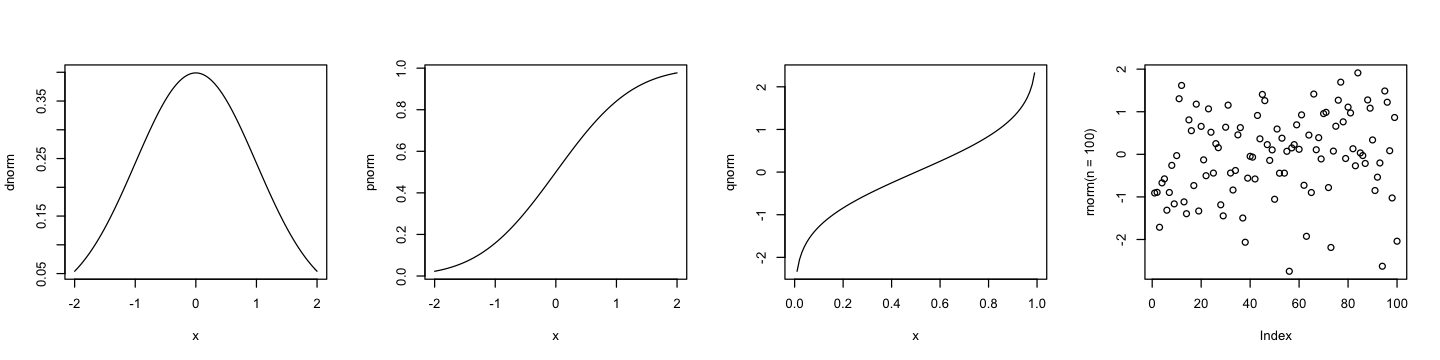

In [8]:
# Distinguish 4 family functions: pnorm, dnorm, qnorm, rnorm
figsize(12, 3); par(mfrow=c(1, 4))
plot(dnorm, from=-2, to=2) # pdf
plot(pnorm, from=-2, to=2) # cdf
plot(qnorm, from= 0, to=1)
plot(rnorm(n=100))

In [9]:
# Try implementing Skew, Kurt of Normal distribution
skew <- function(x) {
    centralmoment <- mean((x - mean(x))^3)
    centralmoment/(sd(x)^3)
}

kurt <- function(x) {
    centralmoment <- mean((x - mean(x))^4)
    centralmoment/(sd(x)^4) - 3
}

# Expected: 
#  - Skew = 0 (b/c Normal distribution is symmetric)
#  - Kurt = 0
skew(z)
kurt(z)

[1] 0.007943286

[1] 0.001093972

In [10]:
# Take the median of Exponential by finding x such that cdf(x) = 1/2
# Or, finding a root of cdf(x) - 1/2 = 0
# Note: We know that 
g <- function(x) { pexp(x) - 1/2 }
uniroot(g, lower=0, upper=1)

$root
[1] 0.6931482

$f.root
[1] 5.002714e-07

$iter
[1] 5

$init.it
[1] NA

$estim.prec
[1] 6.103516e-05

In [11]:
# Cleaner solution, using qexp()
# The result above should equal qexp(1/2)
qexp(1/2)

[1] 0.6931472

$maximum
[1] 5.000006

$objective
[1] 21.05608

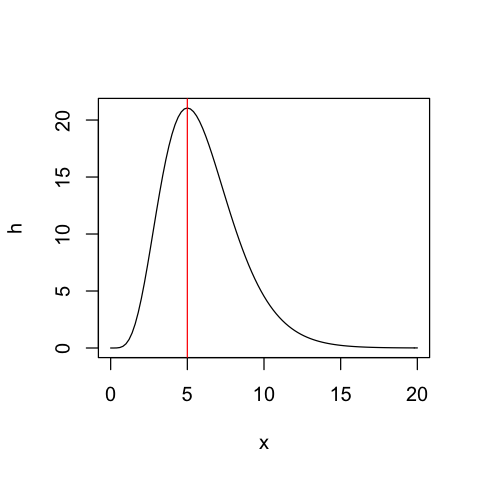

In [12]:
# Find the mode of a function
h <- function(x) { x^5 * exp(-x) }
result <- optimize(h, lower=0, upper=20, maximum=TRUE)
result

figsize(4, 4)
plot(h, from=0, to=20)
abline(v=result$maximum, col='red')

In [13]:
# For discrete r.v.s
# Manually find the median via the CDF of Binomial distribution (pbinom)
n <- 50; p <- 0.2
x <- pbinom(0:n, n, p)
which.max(x >= 0.5) # Select the half right region (CDF(X) >= 1/2), pick the first matching index
# NOTE: the result is the index, not value. So, it's the index of the median, not the median
# Since R indexing starts from 1 (not zero :|), the median should be 10

[1] 11

In [14]:
# Another approach, use the built-in median() function on the simulation data
# Data is drawn by the function rbinom()
x <- rbinom(10000, n, p)
median(x)

[1] 10